In [36]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [69]:
#Reading csv
df = pd.read_csv("Final (1).csv",delimiter = ';')
df

,Initial Side,Initial Velocity,Material,r distance (cm),Distance to Origin,Direction,Final Side
0,Heads,Free fall,Carpet,13,1,South,Tails
1,Heads,Free fall,Carpet,26,3,South,Tails
2,Heads,Free fall,Carpet,18,1,North,Tails
3,Heads,Free fall,Carpet,22,2,East,Heads
4,Heads,Free fall,Carpet,15,1,East,Tails
...,...,...,...,...,...,...,...
245,Tails,Velocity,Carpet,40,6,North West,Heads
246,Tails,Velocity,Carpet,29,7,South,Tails
247,Tails,Velocity,Carpet,35,5,East,Heads
248,Tails,Velocity,Carpet,26,6,North,Heads


In [38]:
#Time for EDA
df.info

<bound method DataFrame.info of     Initial Side Initial Velocity Material  r distance (cm)  \
0          Heads        Free fall   Carpet               13   
1          Heads        Free fall   Carpet               26   
2          Heads        Free fall   Carpet               18   
3          Heads        Free fall   Carpet               22   
4          Heads        Free fall   Carpet               15   
..           ...              ...      ...              ...   
245        Tails         Velocity   Carpet               40   
246        Tails         Velocity   Carpet               29   
247        Tails         Velocity   Carpet               35   
248        Tails         Velocity   Carpet               26   
249        Tails         Velocity   Carpet               46   

     Distance to Origin  Coin Flip    Direction Final Side  
0                     1           1       South      Tails  
1                     3           2       South      Tails  
2                     1     

In [39]:
df.isna().sum()

Initial Side          0
Initial Velocity      0
Material              0
r distance (cm)       0
Distance to Origin    0
Coin Flip             0
Direction             0
Final Side            0
dtype: int64

In [40]:
df.dtypes

Initial Side          object
Initial Velocity      object
Material              object
r distance (cm)        int64
Distance to Origin     int64
Coin Flip              int64
Direction             object
Final Side            object
dtype: object

In [41]:
n = df.nunique(axis=0)
 
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 Initial Side           2
Initial Velocity       2
Material               2
r distance (cm)       52
Distance to Origin    22
Coin Flip              4
Direction              9
Final Side             2
dtype: int64


Text(0.5, 1.0, 'r distance counts')

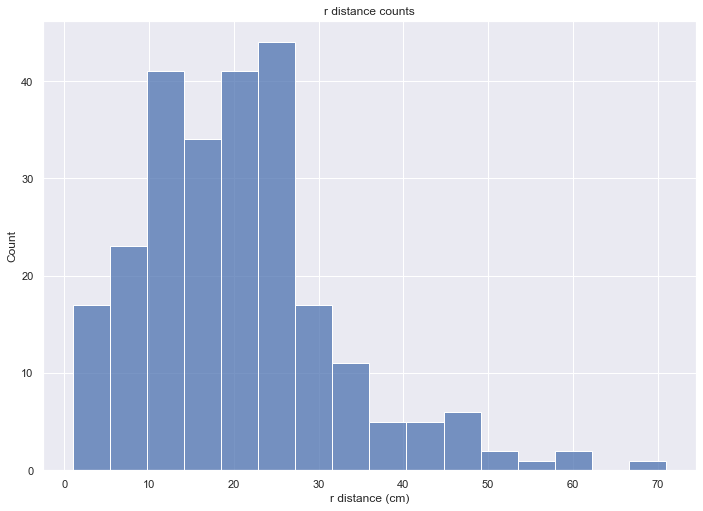

In [42]:
#Visualization
sns.set()
sns.histplot(df["r distance (cm)"])
plt.title("r distance counts")

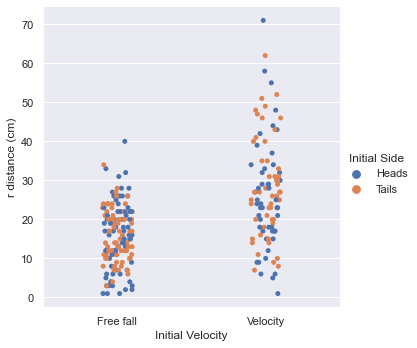

In [43]:
sns.set()
sns.catplot(data = df, x= "Initial Velocity", y= "r distance (cm)", hue = "Initial Side")

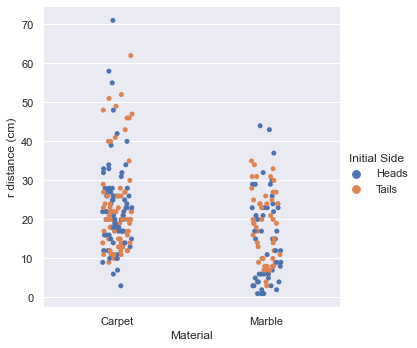

In [44]:
sns.catplot(data = df, x= "Material", y= "r distance (cm)", hue = "Initial Side")

In [70]:
#Preprocess Data
le = LabelEncoder()
df["Initial Side"] = le.fit_transform(df["Initial Side"]) 
df["Final Side"] = le.fit_transform(df["Final Side"]) 
df["Initial Velocity"] = le.fit_transform(df["Initial Velocity"]) 
df["Material"] = le.fit_transform(df["Material"]) 
df["Direction"] = le.fit_transform(df["Direction"])
df

,Initial Side,Initial Velocity,Material,r distance (cm),Distance to Origin,Direction,Final Side
0,0,0,0,13,1,5,1
1,0,0,0,26,3,5,1
2,0,0,0,18,1,2,1
3,0,0,0,22,2,0,0
4,0,0,0,15,1,0,1
...,...,...,...,...,...,...,...
245,1,1,0,40,6,4,0
246,1,1,0,29,7,5,1
247,1,1,0,35,5,0,0
248,1,1,0,26,6,1,0


<AxesSubplot:>

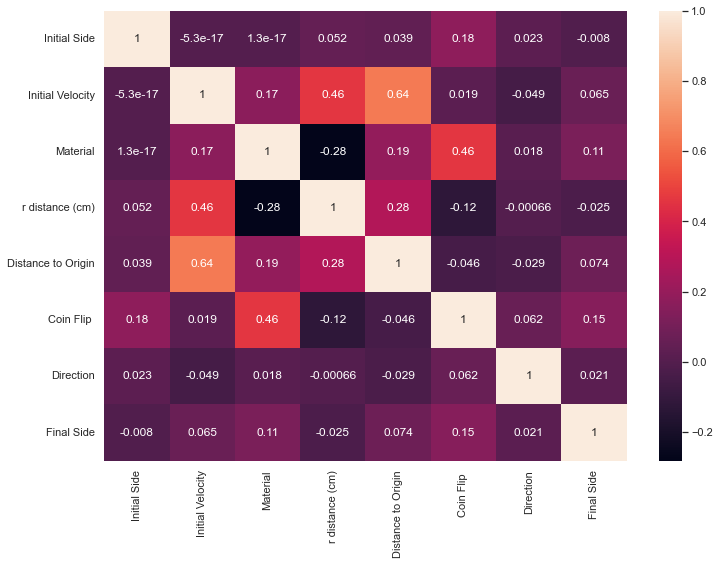

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(),annot = True)

In [108]:
# Ready to Predict
X = df.drop(["r distance (cm)", "Distance to Origin", "Final Side","Direction"], axis=1)
y_coin_position = df["r distance (cm)"]
y_distance_to_origin = df["Distance to Origin"]
y_final_side = df["Final Side"]
y_direction = df["Direction"]

In [109]:
# Train-test split
X_train, X_test, y_train_coin_position, y_test_coin_position = train_test_split(X, y_coin_position, test_size=0.2, random_state=42)
X_train, X_test, y_train_distance_to_origin, y_test_distance_to_origin = train_test_split(X, y_distance_to_origin, test_size=0.2, random_state=42)
X_train, X_test, y_train_final_side, y_test_final_side = train_test_split(X, y_final_side, test_size=0.2, random_state=42)
X_train, X_test, y_direction, y_direction = train_test_split(X, y_direction, test_size=0.2, random_state=42)

In [110]:
# Build the MLPClassifier model for each target variable
model_coin_position = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)
model_distance_to_origin = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)
model_final_side = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)
model_direction = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)

# Train each model
model_coin_position.fit(X_train, y_train_coin_position)
model_distance_to_origin.fit(X_train, y_train_coin_flip)
model_final_side.fit(X_train, y_train_final_side)
model_direction.fit(X_test, y_direction)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

In [113]:
#Accuracy
accuracy_final_side = model_final_side.score(X_test, y_test_final_side)
print(f'Final Side Accuracy: {accuracy_final_side}')

Final Side Accuracy: 0.6


In [137]:
#Randomized events
Initial_side = []
Initial_velocity = []
Material = []
for i in range(500):
    Initial_side.append(random.randint(0,1))
for i in range(500):
    Initial_velocity.append(random.randint(0,1))
for i in range(500):
    Material.append(random.randint(0,1))
    
    
input_data = pd.DataFrame({
    'Initial Side': Initial_side,
    'Initial Velocity': Initial_velocity,
    'Material': Material,
})

# Predictions for randomized events
for i in range(500):
    prediction_coin_position = model_coin_position.predict(input_data)
    prediction_distance_to_origin = model_distance_to_origin.predict(input_data)
    prediction_final_side = model_final_side.predict(input_data)
    prediction_direction = model_direction.predict(input_data)

input_data["r distance"] = prediction_coin_position
input_data["Distance to Origin"] = prediction_distance_to_origin
input_data["Direction"] = prediction_direction
input_data["Final Side"] = prediction_final_side
predicted_data = input_data.drop_duplicates(inplace=False)
display(predicted_data)


,Initial Side,Initial Velocity,Material,r distance,Distance to Origin,Direction,Final Side
0,1,0,0,20,4,8,0
1,0,0,1,3,3,1,1
2,0,1,1,23,5,1,1
3,1,0,1,24,4,5,1
6,0,1,0,18,4,1,1
10,1,1,0,40,5,0,0
11,1,1,1,31,9,1,1
14,0,0,0,22,1,8,0


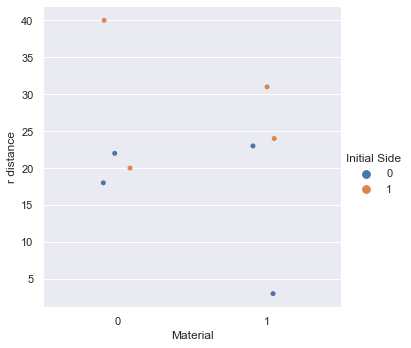

In [140]:
#Final Visualizations
sns.catplot(data = predicted_data, x= "Material", y= "r distance", hue = "Initial Side")

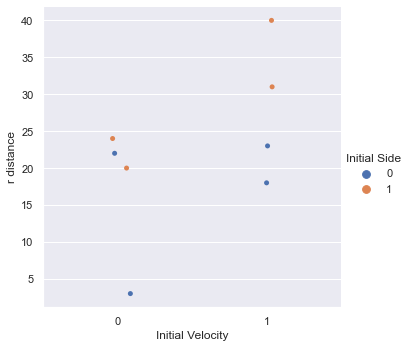

In [142]:
sns.catplot(data = predicted_data, x= "Initial Velocity", y= "r distance", hue = "Initial Side")